<a href="https://colab.research.google.com/github/aljawhara-ibrahim/T5_task2/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [261]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [262]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [263]:
df = pd.read_csv("/content/drive/MyDrive/5- Weekly Project/RTA_Dataset.csv")

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [264]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [265]:
df['Casualty_class'] = df['Casualty_class'].replace('nan', np.nan)
df['Casualty_class'] = df['Casualty_class'].replace('null', np.nan)

df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('nan', np.nan)
df['Sex_of_casualty'] = df['Sex_of_casualty'].replace('null', np.nan)

df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('nan', np.nan)
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('null', np.nan)
df['Age_band_of_casualty'] = df['Age_band_of_casualty'].replace('Unknown', np.nan)


df['Casualty_severity'] = df['Casualty_severity'].replace('nan', np.nan)
df['Casualty_severity'] = df['Casualty_severity'].replace('null', np.nan)

df['Work_of_casuality'] = df['Work_of_casuality'].replace('nan', np.nan)
df['Work_of_casuality'] = df['Work_of_casuality'].replace('null', np.nan)

df['Fitness_of_casuality'] = df['Fitness_of_casuality'].replace('nan', np.nan)
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].replace('null', np.nan)

df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace('nan', np.nan)
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].replace('null', np.nan)



In [266]:
df['Educational_level'].fillna(method='ffill', inplace=True)
df['Educational_level'].fillna(method='bfill', inplace=True)

df['Vehicle_driver_relation'].fillna(method='ffill', inplace=True)
df['Vehicle_driver_relation'].fillna(method='bfill', inplace=True)

df['Driving_experience'].fillna(method='ffill', inplace=True)
df['Driving_experience'].fillna(method='bfill', inplace=True)

df['Type_of_vehicle'].fillna(method='ffill', inplace=True)
df['Type_of_vehicle'].fillna(method='bfill', inplace=True)

df['Owner_of_vehicle'].fillna(method='ffill', inplace=True)
df['Owner_of_vehicle'].fillna(method='bfill', inplace=True)

df['Defect_of_vehicle'].fillna(method='ffill', inplace=True)
df['Defect_of_vehicle'].fillna(method='bfill', inplace=True)

df['Area_accident_occured'].fillna(method='ffill', inplace=True)
df['Area_accident_occured'].fillna(method='bfill', inplace=True)

df['Fitness_of_casuality'].fillna(method='ffill', inplace=True)
df['Fitness_of_casuality'].fillna(method='bfill', inplace=True)

df['Type_of_collision'].fillna(method='ffill', inplace=True)
df['Type_of_collision'].fillna(method='bfill', inplace=True)

df['Service_year_of_vehicle'].fillna(method='ffill', inplace=True)
df['Service_year_of_vehicle'].fillna(method='bfill', inplace=True)

df['Road_allignment'].fillna(method='ffill', inplace=True)
df['Road_allignment'].fillna(method='bfill', inplace=True)

df['Types_of_Junction'].fillna(method='ffill', inplace=True)
df['Types_of_Junction'].fillna(method='bfill', inplace=True)

df['Road_surface_type'].fillna(method='ffill', inplace=True)
df['Road_surface_type'].fillna(method='bfill', inplace=True)

df['Vehicle_movement'].fillna(method='ffill', inplace=True)
df['Vehicle_movement'].fillna(method='bfill', inplace=True)

df['Work_of_casuality'].fillna(method='ffill', inplace=True)
df['Work_of_casuality'].fillna(method='bfill', inplace=True)

df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0], inplace=True)
df['Age_band_of_casualty'].fillna(df['Age_band_of_casualty'].mode()[0], inplace=True)


<ipython-input-266-a4f0a30e2b5a>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Educational_level'].fillna(method='ffill', inplace=True)
<ipython-input-266-a4f0a30e2b5a>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Educational_level'].fillna(method='bfill', inplace=True)
<ipython-input-266-a4f0a30e2b5a>:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Vehicle_driver_relation'].fillna(method='ffill', inplace=True)
<ipython-input-266-a4f0a30e2b5a>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Vehicle_driver_relation'].fillna(method='bfill', inplace=True)
<ipython-input-266-a4f0a30e2b5a>:7: FutureWarning: Series.fi

In [267]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [268]:
# Check for duplicates
df.duplicated().sum()

0

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

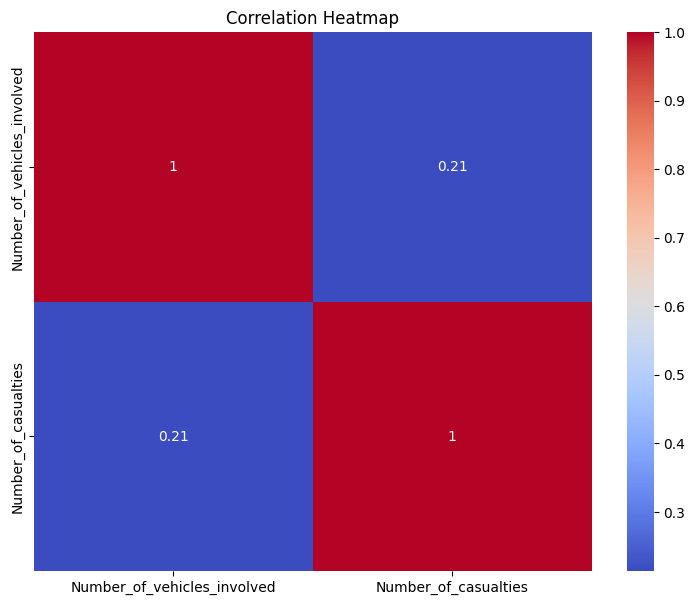

In [270]:
import math
import matplotlib.pyplot as plt
import seaborn as sns
num_column = df[['Number_of_vehicles_involved','Number_of_casualties']]
correlation_matrix= num_column.corr()
plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [271]:
label_encoder= LabelEncoder()
df['Encode_Age_driver']= label_encoder.fit_transform(df['Age_band_of_driver'])
print(df[['Age_band_of_driver','Encode_Age_driver']])

      Age_band_of_driver  Encode_Age_driver
0                  18-30                  0
1                  31-50                  1
2                  18-30                  0
3                  18-30                  0
4                  18-30                  0
...                  ...                ...
12311              31-50                  1
12312            Unknown                  4
12313            Over 51                  2
12314              18-30                  0
12315              18-30                  0

[12316 rows x 2 columns]


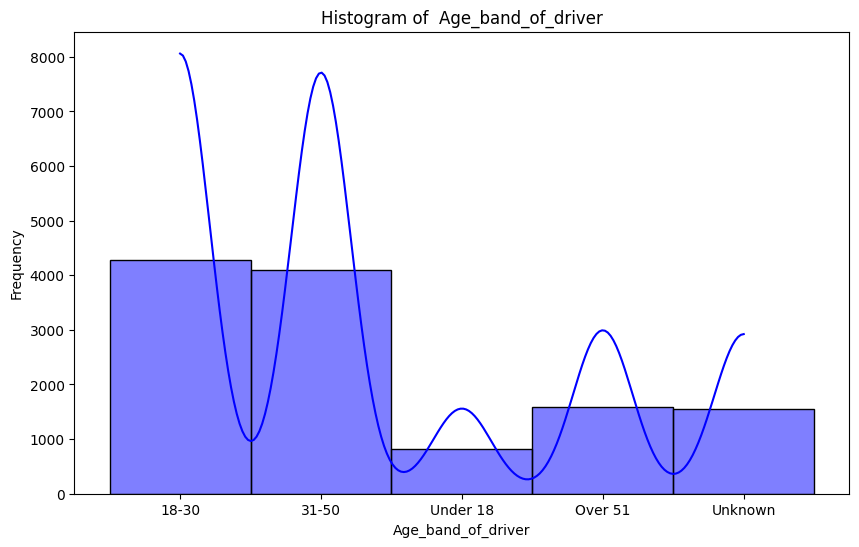

In [272]:
#df.plot.scatter(x='Age_band_of_driver',y='Number_of_casualties')

plt.figure(figsize=(10,6))
sns.histplot(df['Age_band_of_driver'], kde=True, bins=20 , color ='blue')
plt.title('Histogram of  Age_band_of_driver')
plt.xlabel('Age_band_of_driver')
plt.ylabel('Frequency')
plt.show()

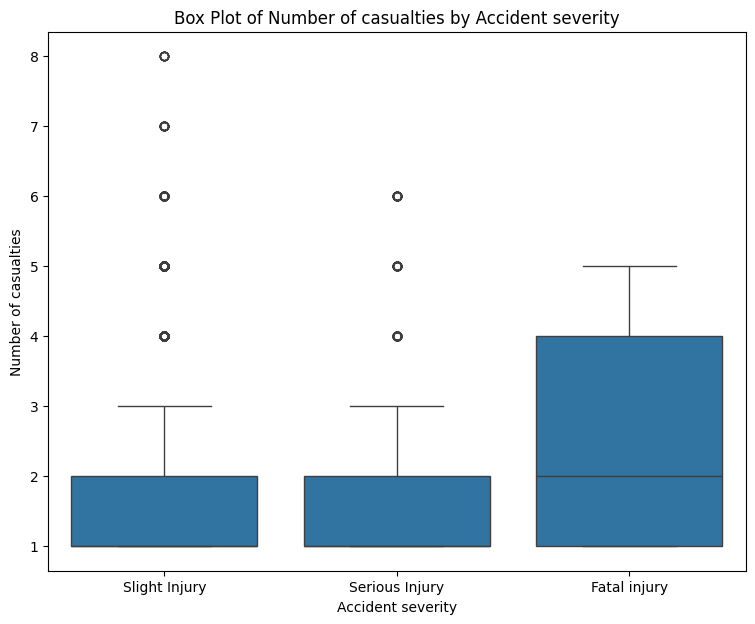

In [273]:
plt.figure(figsize=(9,7))
sns.boxplot(x='Accident_severity', y='Number_of_casualties', data=df)
plt.title('Box Plot of Number of casualties by Accident severity')
plt.xlabel('Accident severity')
plt.ylabel('Number of casualties')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [274]:
label_encoder= LabelEncoder()
df['Encode_Accident_severity']= label_encoder.fit_transform(df['Accident_severity'])
print(df[['Accident_severity','Encode_Accident_severity']])

      Accident_severity  Encode_Accident_severity
0         Slight Injury                         2
1         Slight Injury                         2
2        Serious Injury                         1
3         Slight Injury                         2
4         Slight Injury                         2
...                 ...                       ...
12311     Slight Injury                         2
12312     Slight Injury                         2
12313    Serious Injury                         1
12314     Slight Injury                         2
12315     Slight Injury                         2

[12316 rows x 2 columns]


In [275]:
X = df[['Number_of_casualties','Number_of_vehicles_involved']]
y = df['Encode_Accident_severity']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [276]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    # Test options and evaluation metric
	kfold = StratifiedKFold(n_splits=10)
	cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.847645 (0.000267)
KNN: 0.737529 (0.126810)
CART: 0.848965 (0.002198)
SVM: 0.848864 (0.001616)


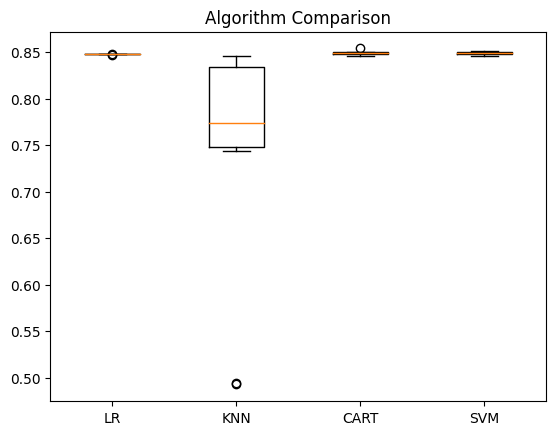

In [277]:
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [278]:
from sklearn.linear_model import LogisticRegression
# Assuming X and y are defined
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)


LogisticRegression(random_state=42)

In [279]:
y_proba = log_reg.predict_proba(x_test)

#### Decision Tree Classifier

In [280]:
# Initialize a DecisionTreeClassifier with a maximum depth of 2 and random state for reproducibility
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the DecisionTreeClassifier on the dataset
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [281]:
y_pred_dec = tree_clf.predict(x_test)

In [294]:
print(accuracy_score(y_test, y_pred_dec))
print(confusion_matrix(y_test, y_pred_dec))
print(classification_report(y_test, y_pred_dec))

0.8376623376623377
[[   0    0   37]
 [   0    0  363]
 [   0    0 2064]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.00      0.00      0.00       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.28      0.33      0.30      2464
weighted avg       0.70      0.84      0.76      2464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [282]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_dec)

array([[   0,    0,   37],
       [   0,    0,  363],
       [   0,    0, 2064]])

#### Support Vector Machine (SVM)

In [283]:
from sklearn.svm import SVC
# Train a linear SVM classifier
svm_clf = SVC(kernel="linear", C=1.0)
svm_clf.fit(X, y)


SVC(kernel='linear')

In [284]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

# Create a pipeline for Polynomial SVM Classifier
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
])

# Fit the pipeline to the data
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

In [285]:
 # Define a function to plot the decision boundary and decision function values of a classifier
def plot_predictions(clf, axes):
    # Generate a mesh grid for the given axes boundaries
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]  # Create input features from the mesh grid
    y_pred_svm = clf.predict(X).reshape(x0.shape)  # Predict classes for each point on the mesh grid
    y_decision = clf.decision_function(X).reshape(x0.shape)  # Compute decision function values


#### K-Neighbors Classifier

In [286]:
# Importing the KNeighborsClassifier class from scikit-learn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Creating a KNeighborsClassifier instance with the following parameters:
# - 'weights' set to 'distance' to give closer neighbors more influence on the prediction
# - 'n_neighbors' set to 4, specifying the number of neighbors to consider for classification
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

# Fitting the KNeighborsClassifier model to the training data (X_train and y_train)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [287]:
# Predicting labels for the test data (X_test) using the trained KNeighborsClassifier model (knn_clf)
y_knn_pred = knn_clf.predict(x_test)

In [292]:
print(accuracy_score(y_test, y_knn_pred))
print(confusion_matrix(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

0.7426948051948052
[[   0   10   27]
 [   0  122  241]
 [   0  356 1708]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.25      0.34      0.29       363
           2       0.86      0.83      0.85      2064

    accuracy                           0.74      2464
   macro avg       0.37      0.39      0.38      2464
weighted avg       0.76      0.74      0.75      2464



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [288]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(knn_clf, x_train, y_train, cv=3)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_knn_pred)


array([[   0,   10,   27],
       [   0,  122,  241],
       [   0,  356, 1708]])

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [291]:
# Importing the accuracy_score function from scikit-learn's metrics module
from sklearn.metrics import accuracy_score

# Calculating the accuracy score by comparing the true labels (y_test) with the predicted labels (y_knn_pred)
accuracy = accuracy_score(y_test, y_knn_pred)

# Displaying the accuracy score
accuracy

0.7426948051948052